 # Приоритизация гипотез и анализ A/B-теста

   Вместе с отделом маркетинга крупного интернет- магазина, необходимо проаналтизировать гипотезы для увеличения выручки:
приоритизировать их, запустить A/B-тест и сделать выводы.

## Загрузим данные и подготовим их к анализу

In [ ]:
import pandas as pd
import numpy as np
import datetime   as dt
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import scipy.stats as stats

In [ ]:
try:
    hypothesis = pd.read_csv('hypothesis.csv')# гипотезы
    orders = pd.read_csv('orders.csv') # заказы
    visitors = pd.read_csv('visitors.csv') # пользователи
except:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')
    orders = pd.read_csv('/datasets/orders.csv')
    visitors = pd.read_csv('/datasets/visitors.csv')

### Изучим данные и выполним предобработку

In [ ]:
 hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [ ]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


#### Переименуем столбцы

Приведем все названия столбцов к нижнему регистру

In [ ]:
#приведем все названия столбцов к нижнему регистру
hypothesis.columns = hypothesis.columns.str.lower()

#### Приведем данные к нужному типу данных

In [ ]:
# преобразование данных о времени
visitors['date'] = pd.to_datetime(visitors['date'])
orders['date'] = pd.to_datetime(orders['date'])

#### Проверим данные на наличие пропусков

In [ ]:
visitors.isna().sum() #проверим пропуски

date        0
group       0
visitors    0
dtype: int64

In [ ]:
orders.isna().sum() #проверим пропуски

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [ ]:
hypothesis.isna().sum() #проверим пропуски

hypothesis    0
reach         0
impact        0
confidence    0
efforts       0
dtype: int64

#### Проверим данные на дубликаты

In [ ]:
dupl = hypothesis[hypothesis.duplicated()] #проверим дубликаты
dupl

,hypothesis,reach,impact,confidence,efforts


In [ ]:
dupl = orders[orders.duplicated()] #проверим дубликаты
dupl

,transactionId,visitorId,date,revenue,group


In [ ]:
dupl = visitors[visitors.duplicated()] #проверим дубликаты
dupl

,date,group,visitors


#### Проверим уникальные значения

In [ ]:
hypothesis['hypothesis'].value_counts() #проверим уникальные значения

Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар             1
Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей                                1
Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей              1
Запустить акцию, дающую скидку на товар в день рождения                                                         1
Запустить собственную службу доставки, что сократит срок доставки заказов                                       1
Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок                1
Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию            1
Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов                        1
Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию 

In [ ]:
orders['transactionId'].nunique()

1197

Количество уникальных заказов совпадает с количеством строк, значит дубликатов нет.

In [ ]:
orders['visitorId'].nunique()

1031

Количество уникальных покупателей меньше, чем количество заказов. Это говорит о том, что есть покупаетли совершившие несколько заказов. Все в порядке.

**В ходе предобработки данных переименованы столбцы, изменены типы данных, выполнена проверка на выявление пропусков данных, дубликатов и неявных дубликатов**

## Приоритизация гипотез

### Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [ ]:
#pd.set_option('display.max_colwidth', None) # расширим столбец с гипотизой
pd.options.display.max_colwidth = 120
hypothesis['ICE'] = round (( hypothesis['impact'] *  hypothesis['confidence'])/ hypothesis['efforts'],2)
hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False).head(15)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


Наиболее перспективные гипотезы:

    - Запустить акцию, дающую скидку на товар в день рождения   
    - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
    - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок  

### Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [ ]:
hypothesis.head(10)

,hypothesis,reach,impact,confidence,efforts,ICE
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20


In [ ]:
hypothesis['RICE'] = (hypothesis['reach']* hypothesis['impact'] * hypothesis['confidence'])/hypothesis['efforts']
hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False).head(10)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Наиболее перспективные гипотезы:

    - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок   
    - Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
    - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
    
Теперь на первом месте гипотеза под номером 7. Ее параметр Reach 10, что выше, чем у других. Значит она затронет большее количество прользователей.
В то время как гипотеза 8 сдвинулась на пятое меcто, поскольку имеет низкое значение параметра Reach

Главным отличием методов ICE и RICE является то, что RICE учитывает фактор охвата, т.е на какое количество людей повлияет изменение в течение определенного периода времени, а не только силу гипотезы. В данном случае, мы видим что параметр reach изменил лидирующие гипотезы.


## Анализ A/B-теста

Определим с какими группами теста предстоит работать

In [ ]:
orders['group'].unique()

array(['B', 'A'], dtype=object)

В тесте участвуют 2 группы А и В

Определим даты начала и окончания теста

In [ ]:
# определим даты теста
min_date = orders['date'].min()
max_date = orders['date'].max()
print('Дата начала теста', min_date)
print('Дата окончания теста', max_date)


Дата начала теста 2019-08-01 00:00:00
Дата окончания теста 2019-08-31 00:00:00


Проверим, попали ли одни и те же пользователи в обе группы А и В

In [ ]:
orders['visitorId'].nunique() # количество уникальных пользователей

1031

In [ ]:
a = orders.query('group == "A"') # срез с пользователями группы А
b = orders.query('group == "B"') # срез с пользователями группы В
double_ab = a.merge(b, on='visitorId', how='inner') # объединяем в таблицу
double_ab.head()

,transactionId_x,visitorId,date_x,revenue_x,group_x,transactionId_y,date_y,revenue_y,group_y
0,2961555356,4069496402,2019-08-15,400,A,1473132782,2019-08-12,640,B
1,2223239646,199603092,2019-08-15,3488,A,437656952,2019-08-02,3488,B
2,62794304,199603092,2019-08-22,6976,A,437656952,2019-08-02,3488,B
3,2971973105,199603092,2019-08-27,2790,A,437656952,2019-08-02,3488,B
4,1941707234,199603092,2019-08-12,6438,A,437656952,2019-08-02,3488,B


In [ ]:
double_ab.shape


(183, 9)

In [ ]:
print('Пользователей, состоящих в двух группах:', double_ab['visitorId'].nunique())

Пользователей, состоящих в двух группах: 58


**В реальном тесте необходимо проводить А/А тест, чтобы гарантировать уникальные значения идентификаторов пользователя в каждой группе. Повторяться они не должны, это грубое нарушение.
В проекте удалять таких пользователь не будем, это приведет к удалению более 15% данных (всего в orders 1197 строк, удалить 189 строк, из них 58 уникальных). Т.е. даже если удалить эти данные, результат учебного теста все равно будет некорректным.**

Проверим равномерность распределения по тестовым группам. Посчитаем количество пользователей в обоих группах теста.

In [ ]:
print('Количество пользователей в группе А:', a['visitorId'].nunique())
print('Количество пользователей в группе B:', b['visitorId'].nunique())

Количество пользователей в группе А: 503
Количество пользователей в группе B: 586


Распределение неравномерно. Количество пользователей в группе В на 83 человека больше.

### Построим график кумулятивной выручки по группам

Прочтём данные из файлов с результатами A/B-тестирования

In [ ]:
orders = pd.read_csv('/datasets/orders.csv', sep=',')
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

visitors = pd.read_csv(
    '/datasets/visitors.csv', sep=','
)
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

print(orders.head())
print(visitors.head())

   transactionId   visitorId       date  revenue group
0     3667963787  3312258926 2019-08-15     1650     B
1     2804400009  3642806036 2019-08-15      730     B
2     2961555356  4069496402 2019-08-15      400     A
3     3797467345  1196621759 2019-08-15     9759     B
4     2282983706  2322279887 2019-08-15     2308     B
        date group  visitors
0 2019-08-01     A       719
1 2019-08-02     A       619
2 2019-08-03     A       507
3 2019-08-04     A       717
4 2019-08-05     A       756


In [ ]:
#Создадим массив уникальных пар значений дат и групп теста методом drop_duplicates()
datesGroups = orders[['date', 'group']].drop_duplicates()

#Рассчитаем кумулятивные данные
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': 'nunique',
            'visitorId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]


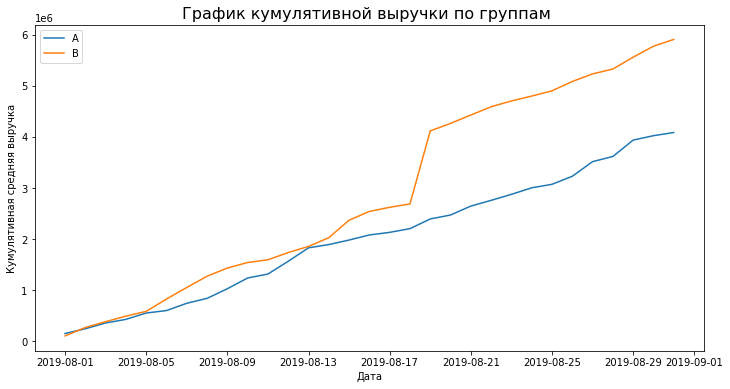

In [ ]:
plt.figure(figsize=(12,6))

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.legend()
plt.xlabel('Дата')
plt.ylabel('Кумулятивная средняя выручка')
plt.title('График кумулятивной выручки по группам ', fontsize=16)
plt.show();

Выручка почти равномерно увеличивается в течение всего теста.
Однако график выручки группы В в середине теста резко растет. Это может сигнализировать о всплеске числа заказов, либо о появлении очень дорогих заказов в выборке

### Построим график кумулятивного среднего чека по группам

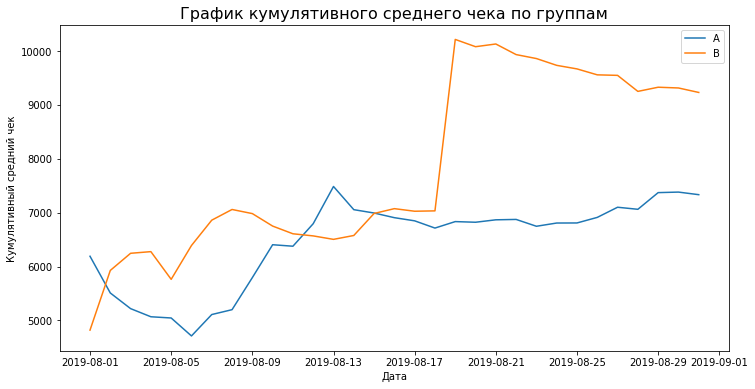

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend()
plt.xlabel('Дата')
plt.ylabel('Кумулятивный средний чек')
plt.title('График кумулятивного среднего чека по группам', fontsize=16);

Средний чек тоже становится равномерным ближе к концу теста для группы A и продолжает колебаться для группы B. Очевидно, в группу B в середине теста попали крупные заказы (резкий всплеск на графике). Тогда ей нужно больше данных, чтобы прийти к реальному среднему чеку и установиться на его уровне.

### Построим график относительного изменения кумулятивного среднего чека группы B к группе A

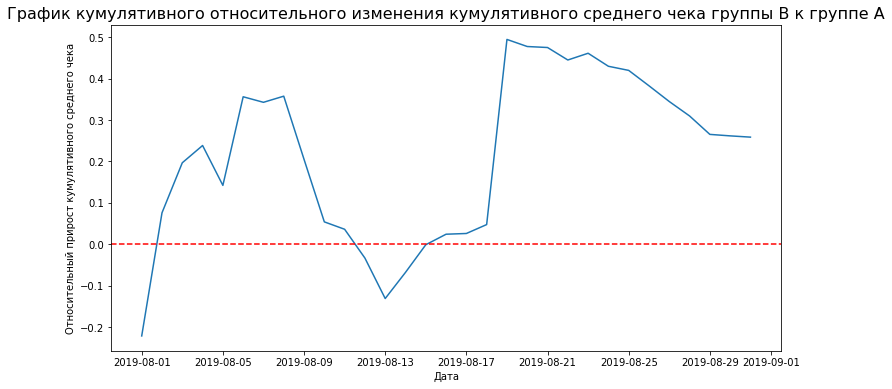

In [ ]:
plt.figure(figsize=(12,6))

# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date',\
                                                   how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']
                                           /mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']
                                                                                 /mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='red', linestyle='--')

plt.xlabel('Дата')
plt.ylabel('Относительный прирост кумулятивного среднего чека')
plt.title(label = 'График кумулятивного относительного изменения кумулятивного среднего чека группы B к группе A', fontsize=16);

В нескольких точках график различия между сегментами резко «скачет». Это говорит о наличии крупных заказов и выбросов.

### Построим график кумулятивного среднего количества заказов на посетителя по группам

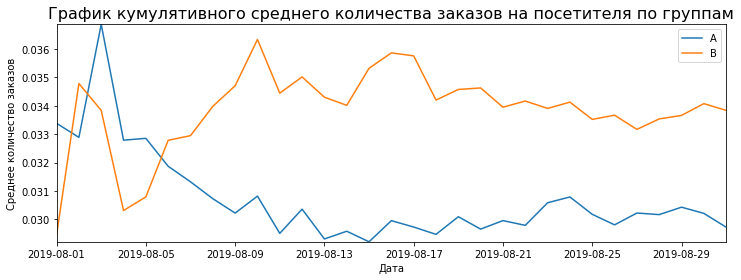

In [ ]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']
# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']
# строим графики
plt.figure(figsize=(12,4))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
# задаем масштаб осей
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31), cumulativeData['conversion'].min(),cumulativeData['conversion'].max()])
plt.xlabel('Дата')
plt.ylabel('Среднее количество заказов')
plt.title(label = 'График кумулятивного среднего количества заказов на посетителя по группам', fontsize=16);

Значения кумулятивного среднего количества заказов колебались для обеих групп около одного значения в начале теста, но затем  группа B вырвалась вперёд и зафиксировалась, а среднее количество заказов группы A также зафиксировалась с немного меньшим значением.

### Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

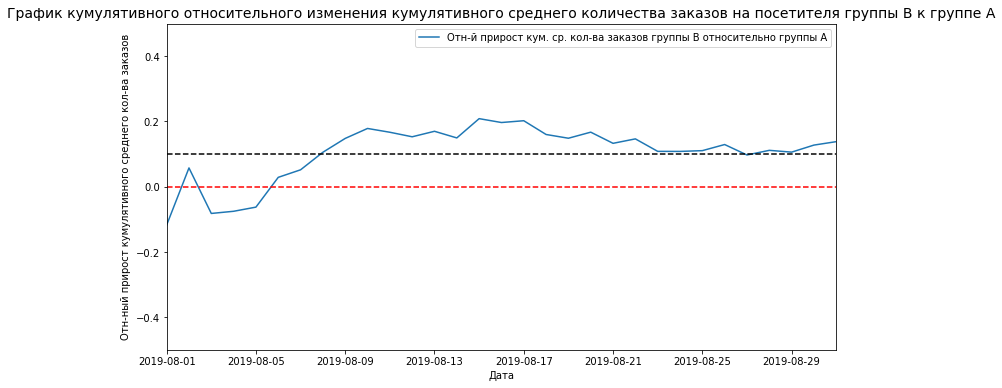

In [ ]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], \
                                                                           left_on='date', right_on='date', how='left',\
                                                                           suffixes=['A', 'B'])
plt.figure(figsize=(12,6))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/
         mergedCumulativeConversions['conversionA']-1, label="Отн-й прирост кум. ср. кол-ва заказов группы B относительно группы A")
plt.legend()
plt.axhline(y=0, color='red', linestyle='--')
plt.axhline(y=0.1, color='black', linestyle='--')
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31), -0.5, 0.5]);
plt.xlabel('Дата')
plt.ylabel('Отн-ный прирост кумулятивного среднего кол-ва заказов')
plt.title(
    label = 'График кумулятивного относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A',\
    fontsize=14);

В начале теста группа B проигрывала группе A, затем вырвалась вперёд. График колеблеться. Пока группа В опережает группу А прмерно на 10%, но прирост еще не зафиксировался. Делать какие-либо выводы по тесту нельзя. Стоит проанализировать аномалии, возможно, они изменят картину.

### Построим точечный график количества заказов по пользователям

Создадим таблицу с количеством заказов уникальных пользователей

In [ ]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
ordersByUsers.columns = ['visitorId', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

       visitorId  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5


Есть пользователи, которые совершали 5, 8, 9 и 11 заказов. Значительно больше, чем обычный пользователь за неделю

Построим гистрограмму распределения количества заказов на одного пользователя

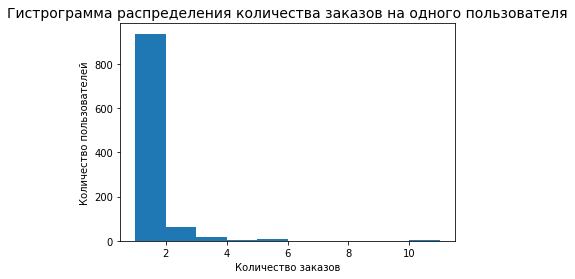

In [ ]:
plt.figure(figsize=(6,4))
plt.hist(ordersByUsers['orders'])
plt.xlabel('Количество заказов')
plt.ylabel('Количество пользователей')
plt.title(
    label = 'Гистрограмма распределения количества заказов на одного пользователя', fontsize=14);

Большинство покупателей заказывали только один раз. Однако доля пользователей с 2-4 заказами тоже значительна.

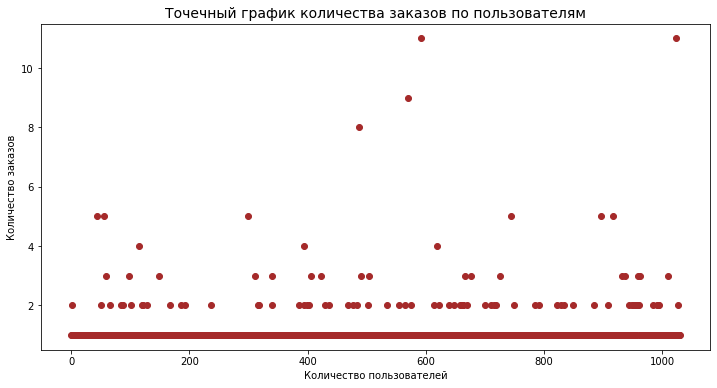

In [ ]:
# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(ordersByUsers)))
_values = pd.Series(range(0,len(ordersByUsers)))
plt.figure(figsize=(12,6))
plt.scatter(x_values, ordersByUsers['orders'], c='brown')
plt.ylabel('Количество заказов')
plt.xlabel('Количество пользователей')
plt.title(
    label = 'Точечный график количества заказов по пользователям', fontsize=14);

Большое количество пользователей с 2-4 заказами. Чтобы определить считать их аномалиями или нет, посчитаем перцентили и определим границу аномальных значний

### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей

In [ ]:
print(ordersByUsers.sort_values(by='orders', ascending=False).head())
print(np.percentile(ordersByUsers['orders'], [95, 99]))

       visitorId  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
[2. 4.]


Не более 5% пользователей совершали больше 2 заказов, и не более 1% совершали более 4 заказов. Выберем 4 заказа на одного пользователя за верхнюю границу числа заказов, и отсеем аномальных пользователей по ней в п.3.12

### Построим точечный график стоимостей заказов

In [ ]:
print(orders.sort_values(by='revenue', ascending=False).head())

      transactionId   visitorId       date  revenue group
425       590470918  1920142716 2019-08-19  1294500     B
1196     3936777065  2108080724 2019-08-15   202740     B
858       192721366  1316129916 2019-08-27    93940     A
1136      666610489  1307669133 2019-08-13    92550     A
744      3668308183   888512513 2019-08-27    86620     B


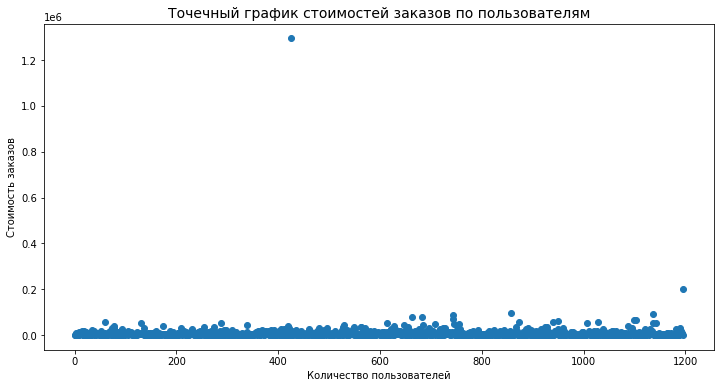

In [ ]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.figure(figsize=(12,6))
plt.scatter(x_values, orders['revenue'])
plt.ylabel('Стоимость заказов')
plt.xlabel('Количество пользователей')
plt.title(
    label = 'Точечный график стоимостей заказов по пользователям', fontsize=14);

Для наглядности, уберем из графика экстримальные значения двух самх дорогих заказов и ограничим стоимостью 100 000 руб.

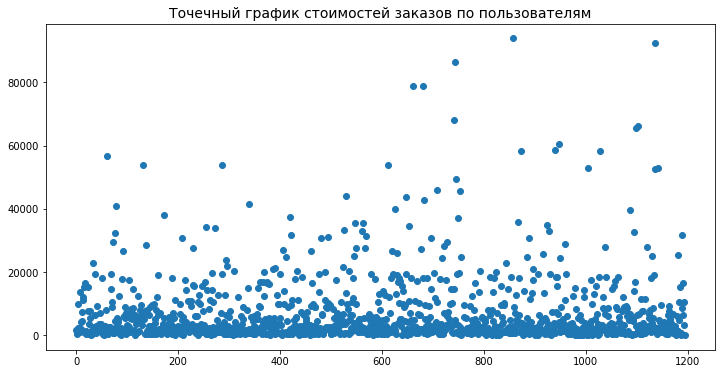

In [ ]:
filtr = orders[orders['revenue'] <= 100000]['revenue']
x_values = pd.Series(range(0,len(filtr)))
plt.figure(figsize=(12,6))
plt.scatter(x_values, filtr)
plt.title(
    label = 'Точечный график стоимостей заказов по пользователям', fontsize=14);

Всё, как предполагали: есть несколько дорогих заказов.
Самый дорогой заказ был сделан 19 августа. Это и есть тот скачок, что мы видим на графике кумулятивного среднего чека по группам. Большая часть заказов ограничена 10 000 рублей, но также есть много закзов 20-40 т.р.
Чтобы определиться с границами аномалий, посчитаем перцентили

### Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов

In [ ]:
print(orders.head())
print(np.percentile(orders['revenue'], [95, 99]))

   transactionId   visitorId       date  revenue group
0     3667963787  3312258926 2019-08-15     1650     B
1     2804400009  3642806036 2019-08-15      730     B
2     2961555356  4069496402 2019-08-15      400     A
3     3797467345  1196621759 2019-08-15     9759     B
4     2282983706  2322279887 2019-08-15     2308     B
[28000.  58233.2]


Не более 5% заказов дороже 28 000 рублей и не более 1% дороже 58 234 рублей.
За аномалии приммем данные больше 99 перцентиля - зазакы выше 58 233.2 рублей

Оценили результаты A/B-теста визуально и выяснили, что в данных есть выбросы;
Увидели выбросы и нашли границу для их определения.

### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным

Посчитаем статистическую значимость различий в среднем числе заказов на пользователя и среднем чеке между группами по «сырым» данным — без удаления аномальных пользователей.
Сформулируем гипотезы.
>Нулевая: различий в среднем количестве заказов между группами нет.

>Альтернативная: различия в среднем между группами есть.

Будем использовать для тестирования  критерий Манна-Уитни т.к. в данных есть большие выбросы, алгебраические метрики работают плохо, одно выбивающееся значение существенно влияет на результат.
Это непараметрическй метод, поэтому к нему прибегают тогда, когда работа с самими значениями невозможна из-за выбросов, сильно сдвигающих параметрические результаты. В нашем случае критерий Манна-Уитни должен более вероятно найти статистически значимый эффект.

In [ ]:
# visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'}))
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']
# ordersACummulative = ordersADaily.apply(
#     lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
#         {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
#     ),
#     axis=1,
# ).sort_values(by=['date'])
# ordersACummulative.columns = [
#     'date',
#     'ordersCummulativeA',
#     'revenueCummulativeA',
# ]
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
     .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
 )
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']



**Посчитаем статистическую значимость различия в среднем количестве заказов между группами.**

In [ ]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                     visitors[visitors['group'] == 'A']['visitors'].sum()- len(ordersByUsersA['orders'])
            ),
            name='orders',

        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
             visitors[visitors['group'] == 'B']['visitors'].sum()- len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
print('p-value = {0:.3f}'.format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print('Относительный прирост = {0:.1%}'.format((ordersBDaily['ordersPerDateB'].sum()
                                                /visitors[visitors['group'] == 'B']['visitors'].sum())#visitorsBDaily['visitorsPerDateB'].sum())
                                               /(ordersADaily['ordersPerDateA'].sum()
                                               /visitors[visitors['group'] == 'A']['visitors'].sum()) - 1))#visitorsADaily['visitorsPerDateA'].sum())-1))

p-value = 0.017
Относительный прирост = 13.8%


**p-value = 0.017, что значительно меньше 0.05, поэтому нулевую гипотезу отвергаем. Анализ "сырых данных" сообщает, что между группами есть статистически значимые различия в значениях среднего количества заказов. Относительный прирост среднего группы В к среднему группы А равен 13.8%**

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным

>Нулевая гипотеза: различий в среднем чеке между группами нет.

>Альтернативная гипотеза: различия в среднем чеке между группами есть.

In [ ]:
print('p-value = {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'],\
                                                    orders[orders['group']=='B']['revenue'])[1]))
print('Относительный прирост = {0:.1%}'.format(orders[orders['group']=='B']['revenue'].mean()\
                                               /orders[orders['group']=='A']['revenue'].mean()-1))

p-value = 0.729
Относительный прирост = 25.9%


**p-value = 0.729, что больше 0.05, значит статистически значимый различий между средними чеками в группах нет. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Впрочем, средний чек группы А значительно ниже среднего чека группы В.**

### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

Приступаем к подготовке очищенных от аномалий данных.
 - 95-й и 99-й перцентили средних чеков равны 28000 руб. и 58233.2 руб.
 - 95-й и 99-й перцентили числа заказов на одного пользователя равны 2 и 4 заказам на пользователя.
Примем за аномальных пользователей тех, кто совершил 4 заказа и более, или совершил заказ на сумму свыше 58233.2 рублей. Так мы уберём 1% пользователей с наибольшим числом заказов и от 1% до 5% заказов с наибольшей стоимостью.

In [ ]:
usersWithManyOrders = pd.concat(
    [
      ordersByUsersA[ordersByUsersA['orders'] > np.percentile(ordersByUsers['orders'], 99)]['visitorId'],
      ordersByUsersB[ordersByUsersB['orders'] > np.percentile(ordersByUsers['orders'], 99)]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > np.percentile(orders['revenue'], 99)]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print('Абсолютные потери:', abnormalUsers.shape[0])
a = abnormalUsers.count()/orders['visitorId'].nunique()
print('Относительные потери:', a)
if a < 5:
     print ('Удаление допустимо, количество аномальных данных {0:.1%}'.format(a))
else:
     print ('Удаление  не допустимо, количество аномальных данных {0:.1%}'.format(a))

Абсолютные потери: 15
Относительные потери: 0.014548981571290009
Удаление допустимо, количество аномальных данных 1.5%


Посчитаем какова доля аномальных данных в выборке и можем ли вообще их удалить без значительного влияния на исследование.

Удаленные строки это примерено 1,5 % от общих данных, что вполне допустимо

Посчитайте статистическую значимость различия среднего количества заказов после удаления аномальных пользователей.

Наши гипотезы:
>Нулевая: различий в среднем количестве заказов между группами нет.

>Альтернативная: различия в среднем между группами есть.

In [ ]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group'] == 'A']['visitors'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group'] == 'B']['visitors'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
print('p-value = {0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительный прирост = {0:.1%}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-value = 0.014
Относительный прирост = 15.3%


**Результаты по среднему количеству заказов практически не изменились. p-value = 0.014 Это меньше 0.05. Отвергаем нулевую гипотезу. Среднее количество заказов группы В выше А на 15.3%**

### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным


Посчитаем статистическую значимость различия средних чеков после удаления аномальных пользователей.
Выведем p-value для сравнения средних чеков между очищенными группами.

Наши гипотезы:
>Нулевая гипотеза: различий в среднем чеке между группами нет.

>Альтернативная гипотеза: различия в среднем чеке между группами есть.

In [ ]:
print('p-value = {0:.3f}'.format(stats.mannwhitneyu(orders[np.logical_and(orders['group'] == 'A',\
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]['revenue'],\
            orders[np.logical_and(orders['group'] == 'B',np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]['revenue'],
        )[1]))
print('Относительный прирост = {0:.1%}'.format(orders[np.logical_and(orders['group'] == 'B',\
                                                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]['revenue'].mean()
        /orders[np.logical_and(orders['group'] == 'A', np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]\
                                               ['revenue'].mean()- 1))

p-value = 0.851
Относительный прирост = -0.6%


**p-value = 0.851, что больше 0.05, значит статистически значимых различий между средними чеками в группах нет. Все также не отвергаем нулевую гипотезу. Значения среднего чека в группах стали ближе друг к доругу.
Но исключив аномальные значения, видим, что теперь средний чек группы В сильно уменьшился и стал даже ниже среднего чека группы А.**

### Результаты теста



> Есть статистически значимые различия по среднему количеству заказов между группами как по «сырым», так и по данным после фильтрации аномалий. Конверсия в группе В стабильно выше, чем в группе А;

>Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;

>График различия среднего количества заказов между группами сообщает, что результаты группы А хуже группы В и нет значительной тенденции к улучшению:

>График различия среднего чека говорит о том, что результаты группы B не зафиксировались, продолжают колебаться. Тем не менее они стабильно лучше результата группы А и сейчас почти на 30 % выше:


## Вывод
Имеет смысл остановить тест, зафиксировать победу группы В. Несмотря на отсутствие статистически значимых различий в значениях среднего чека между группами, в группе В более высокое значение среднего количества заказов. Оно выше на 13% по "сырым" и 15% по "очищенным" данным.